In [2]:
# import smart_import
import matplotlib.pyplot as plt
import numpy as np

from labmate.acquisition_notebook import AcquisitionAnalysisManager

# AcquisitionManager and AnalysisManager

In [ ]:
aqm = AcquisitionAnalysisManager("tmp_data")
# Creates (or loads) the temporary json file

aqm.set_config_file(["files/dummy_config1.txt"])
aqm.set_init_analyse_file("files/init_analyse.py")
# A snapshot of all files in this list will be backed-up with the data.

## Example 1: acquisition with a blocking function

In [4]:
aqm.acquisition_cell("simple_sine")


def acquire_data():
    x = np.linspace(0, 20 * np.pi, 101)
    y = np.sin(x)
    return x, y


x, y = acquire_data()

aqm.save_acquisition(x=x, y=y)

INFO:1:2026_02_05__15_19_23__simple_sine


INFO:2026_02_05__15_19_23__simple_sine
/var/folders/1v/h9jwcx8d3gqgp0m2234vglfw0000gn/T/ipykernel_69993/2100652584.py:6: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


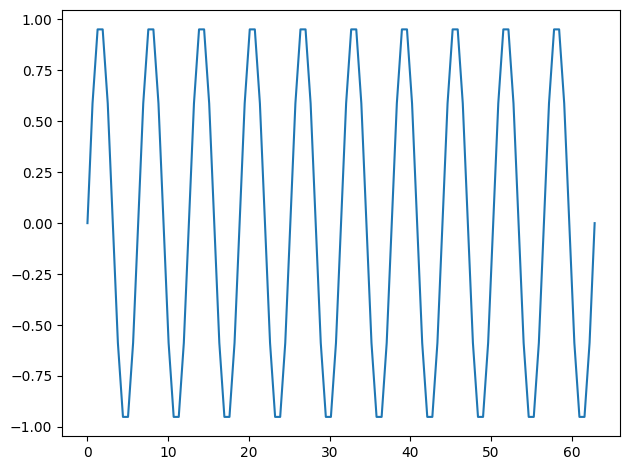

In [5]:
aqm.analysis_cell()

fig = plt.figure()
plt.plot(aqm.data.x, aqm.data.y)
aqm.save_fig(fig, name="fit")
fig.show()

## Example 2: acquisition with a standalone platform (e.g. Quantum Machine)

In [ ]:
aqm.acquisition_cell("sine_qm")

# The code contained in this cell is important as it defines how the data are acquired.


def fetch_new_data():
    """
    This code mimics
    """
    x = np.linspace(0, 20 * np.pi, 101)
    y = np.sin(x)
    return x, y + np.random.random(len(x))  # noqa: NPY002


# submit job to the quantum machine if needed

INFO:labmate.acquisition_notebook.acquisition_analysis_manager:2023_02_19__22_28_01__sine_qm


INFO:labmate.acquisition_notebook.acquisition_analysis_manager:2023_02_19__22_28_01__sine_qm


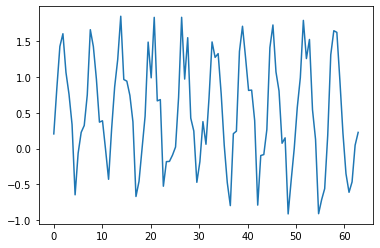

In [ ]:
aqm.analysis_cell()

# print(aqm.is_loaded_data)

# This cell might retrieve some data from a standalone acquisition platform
# (like a quantum machine for instance)
if aqm.current_acquisition is not None:
    x, y = fetch_new_data()
    aqm.save_acquisition(
        x=x, y=y
    )  # doesn't need to be called in the same cell as %%acquisition_cell
    # in fact, the kernel could have been restarted in the meantime
    # (as long as x and y are retrieved somehow)

# Actually, one should
fig = plt.figure()
plt.plot(aqm.data.x, aqm.data.y)

aqm.save_fig(fig, name="fit")

## Example 3: analysis on reloaded data

INFO:labmate.acquisition_notebook.acquisition_analysis_manager:old_data_example


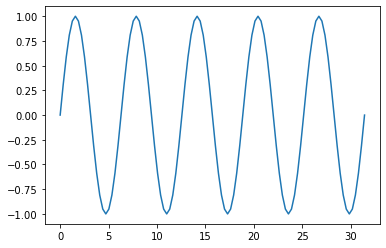

In [ ]:
aqm.analysis_cell("../../tests/data/old_data_example")
# The name of the h5 file is sufficient if it is located in the current data_path.
# Otherwise, a fullpath can be provided.

if (
    aqm.current_acquisition is not None
):  # when an h5 file is specified above, then data should not be fetched anymore
    x, y = fetch_new_data()
    aqm.save_acquisition(
        x=x, y=y
    )  # doesn't need to be called in the same cell as %%acquisition_cell
    # in fact, the kernel could have been restarted in the meantime
    # (as long as x and y are retrieved somehow)

fig = plt.figure()
plt.plot(aqm.data.x, aqm.data.y)
aqm.save_fig(fig);  # even with loaded data, the analysis script and figures are overwritten

## Example 3.2: analysis on reloaded data with the saved code

In [16]:
aqm.analysis_cell("../../tests/data/old_data_example2").get_analysis_code()

INFO:labmate.acquisition_notebook.acquisition_analysis_manager:old_data_example2


"aqm.analysis_cell('../../tests/data/old_data_example2')\n\nplt.figure()\nplt.plot(aqm.data.x_loop.x, aqm.data.x_loop.y)\n\naqm.save_fig()\nplt.show()\n# \n# print(aqm.d.z)"

## Example 4: loop

In [18]:
from labmate.acquisition import AcquisitionLoop

In [19]:
aqm.acquisition_cell("sample_loop")

aqm.aq.x_loop = loop = AcquisitionLoop()
for i in loop(1, 10, 0.5):
    loop(x=i, y=i**2)

aqm.save_acquisition();

INFO:labmate.acquisition_notebook.acquisition_analysis_manager:2023_02_19__22_28_52__sample_loop


INFO:labmate.acquisition_notebook.acquisition_analysis_manager:2023_02_19__22_28_52__sample_loop


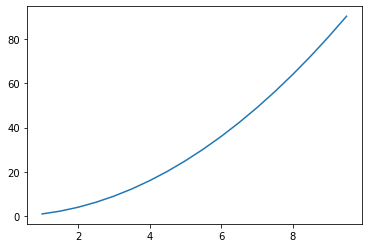

In [20]:
aqm.analysis_cell()

plt.figure()
plt.plot(aqm.data.x_loop.x, aqm.data.x_loop.y)

aqm.save_fig()
plt.show()
#
# print(aqm.d.z)

## Parse config file

In [40]:
aqm = AcquisitionAnalysisManager("tmp_data/", use_magic=False, save_files=False)
aqm.set_config_file("files/dummy_config1.txt")
aqm.acquisition_cell("test")
aqm.save_acquisition()

INFO:labmate.acquisition_notebook.acquisition_analysis_manager:2023_02_21__00_16_08__test


In [44]:
cfg = aqm.parse_config("dummy_config1")